# CMS plotting recommendations and tools tutorial

A standard format style for CMS plots has been approved by the PubComm Steering Board. The primary goal is to display the CMS name in a visible way, so that it appears at first glance, and to present the integrated luminosity and center-of-mass energy is a simple, compact manner. The label "Preliminary" should be removed from the figures in the paper draft that goes to Collaboration Wide Review, so that the figures appear as intended for submission to a journal; it should be kept in the PAS version, as all results remain "preliminary" until the paper is submitted for publication. All figures showing data results should give the center-of-mass energy and the integrated luminosity corresponding to the results being presented.

CMS pushes towards the adoption of one of two tools to produce plots: [`mplhep`](https://github.com/scikit-hep/mplhep) (HEP (CMS) extensions/styling on top of mpl, part of the scikit-hep ecosystem) and [`cmsstyle`](https://github.com/cms-cat/cmsstyle) (recently introduced pyROOT-based library). They both can be installed via pip.

In [3]:
!pip install cmsstyle

In [4]:
!pip install mplhep

In the following, the main CMS recommendations will be reviewed, along with the handles to implement them in both aforementioned tools. To do so, let's first do some useful imports for the examples below.

In [5]:
# ROOT imports 
import os, ROOT
import cmsstyle as CMS

# python imports 
import matplotlib.pyplot as plt  # matplotlib library
import mplhep as hep  # HEP (CMS) extensions/styling on top of mpl

# For constructing examples
import hist  # histogramming library
import numpy as np 

Welcome to JupyROOT 6.30/04


## CMS Label Position
Effectively two positions are allowed - "in-frame" and "out-of-frame", unless particularly necessary otherwise.

<img src="images/ex_labelin.png" width="300"/>
<img src="images/ex_labelout.png" width="300"/>

### CMS label `cmsstyle` implementation

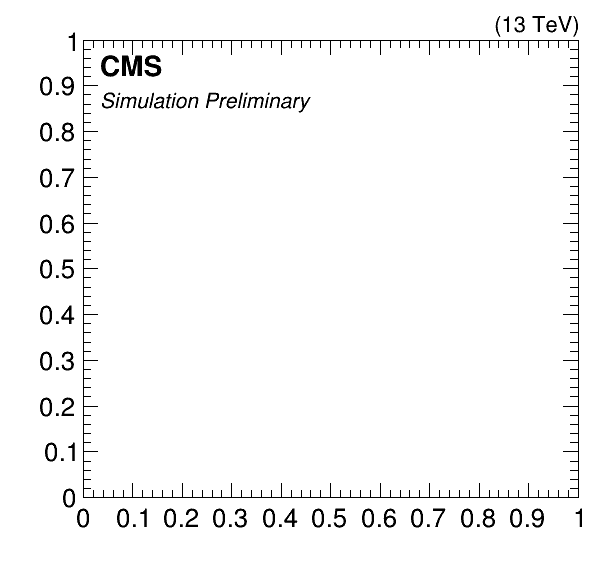

In [6]:
### In-frame
CMS.SetExtraText("Simulation Preliminary")
CMS.SetLumi("")
canv = CMS.cmsCanvas('', 0, 1, 0, 1, '', '', square = CMS.kSquare, extraSpace=0.01, iPos=11)
canv.Draw()

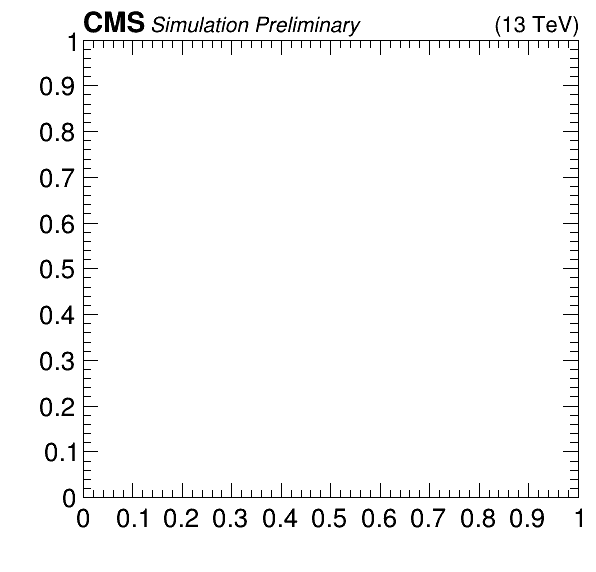

In [7]:
### Out-of-frame
CMS.SetExtraText("Simulation Preliminary")
CMS.SetLumi("")
canv = CMS.cmsCanvas('', 0, 1, 0, 1, '', '', square = CMS.kSquare, extraSpace=0.01, iPos=0)
canv.Draw()

### CMS label `mplhep` implementation

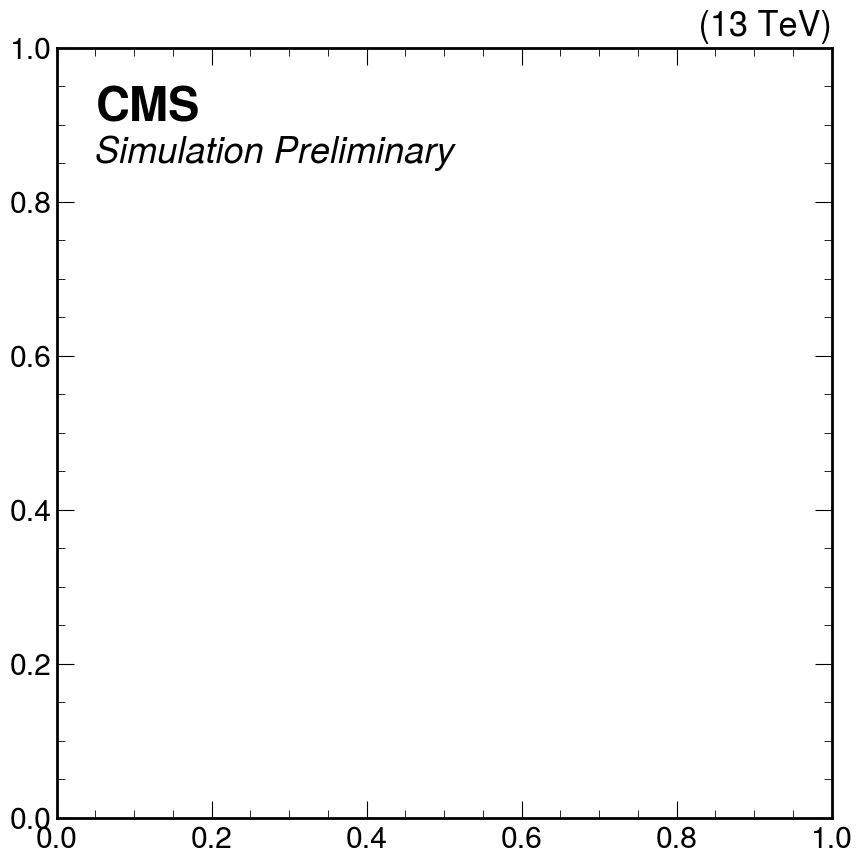

In [21]:
### In-frame
hep.style.use("CMS")
fig, ax  = plt.subplots()
hep.cms.label("Preliminary", loc=2, ax=ax);

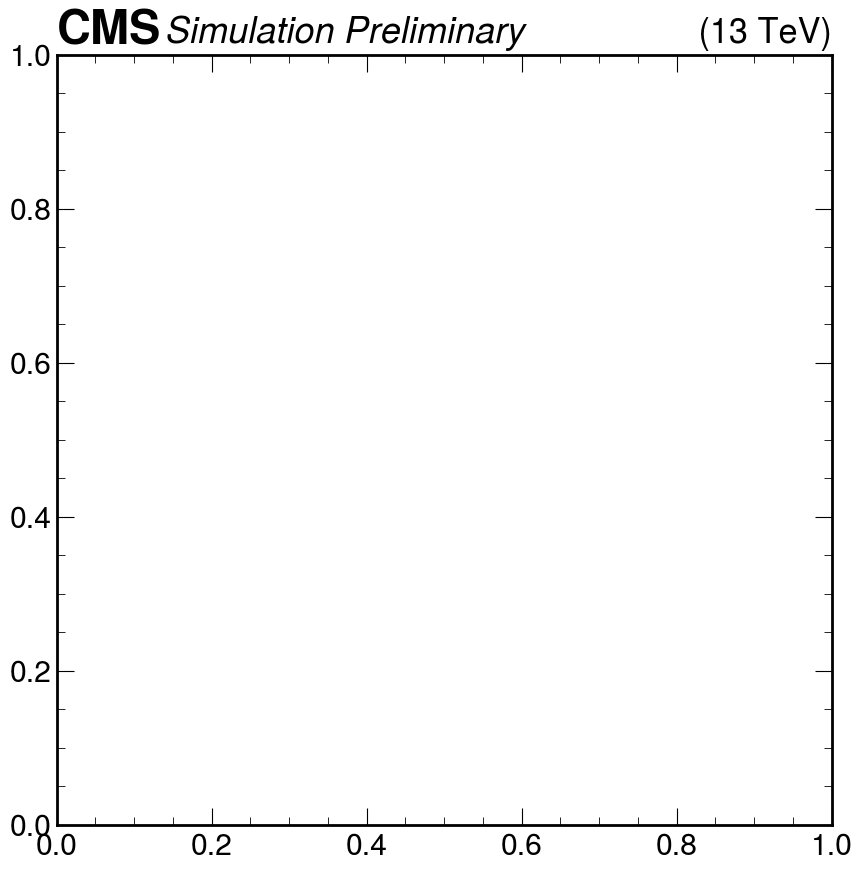

In [24]:
### Out-of-frame
hep.style.use("CMS")
fig, ax  = plt.subplots()
hep.cms.label("Preliminary", loc=0, ax=ax);

## Labeling Guidelines

Should you choose to reimplement the labeling yourself, the following
guidelines should be observed.

- **CMS** is shown in bold, while the secondary label is shown in italics.
- The font size of the **CMS** label should be 1.3 times the size of the secondary label.
- For the in-frame option the CMS label should be located the same distance from
  both axes, with a sufficient gap from the tick marks. The secondary label can be included either below or next to the **CMS** text, but should align with it in both cases.
- For the out-of-frame option, the CMS label should be aligned with the y-axis
  edge. If included the Simulation/Preliminary/etc… labels should be bottom
  aligned with the primary CMS label.

## CMS Label Requirements

| Purpose                       | Has/Uses Data (Incl. corrected MC)         |  Simulation Only  |
| ----------------------------- | ------------------------------------ | ----------------  |
| PAPER                         | **CMS**                              | **CMS** *Simulation* |
| PAPER (supplementary)         | **CMS** *Supplementary*              | **CMS** *Simulation Supplementary* |
| PAS                         | **CMS** *Preliminary*                | **CMS** *Simulation Preliminary* |
| PAS (supplementary)         | **CMS** *Preliminary*                | **CMS** *Simulation Preliminary* |
| Thesis Endorsement Work &dagger;     | **CMS** *Work-in-Progress*              | **CMS** *Simulation Work-in-Progress* |
| Other Non-public Work &dagger;       | **CMS** *Private Work*              | **CMS** *Simulation Private Work* |

&dagger; - Use for internal purposes and student presentations at national conferences. Cannot be included in proceedings. For full rules consult [TWiki](https://twiki.cern.ch/twiki/bin/view/CMS/PhysicsApprovals#Student_presentations_of_unappro).

## Scientific Notation

If scientific notation is being used it is advisable to use the in-frame
labelling to avoid conflict

<img src="images/ex_sci1.png" width="300"/>
<img src="images/ex_sci2.png" width="300"/>

However, if necessary the position of the multiplier can be shifted

### Scientific notation in `mplhep`

In [34]:
# Scientific notation
ax.ticklabel_format(style="sci", scilimits=(-3, 3), useMathText=True)
# Shift multiplier position out
ax.get_yaxis().get_offset_text().set_position((-0.085, 1.05))

### Scientific notation in `cmsstyle`

In [35]:
# Scientific notation
hdf = CMS.GetcmsCanvasHist(canv)
hdf.GetYaxis().SetMaxDigits(2)
# Shift multiplier position
ROOT.TGaxis.SetExponentOffset(-0.10, 0.01, "Y")

## Labels and Colorbars

Finally, when producing plots with colorbars, any potential label on top of the
plot should be aligned to the edge of the axis, not crossing over to to the
colorbar. Further the colorbar should have the same height at the primary axis.

<img src="images/ex_cbar.png" width="300"/>

## Font
The official guidelines specify Helvetica, or its open-source clone called TeX Gyre Heros, as the CMS font of choice. These are selected automatically with the CMS styles in `cmsstyle` and `mplhep`

## Color schemes
The choice of a color scheme is important for three reasons.

- Our results need to be easily understandable and interpretable.
- Colorblindness and journal conversions to grayscale can reduce their acessibility.
- Our results should be aesthetically pleasing

Following a D&I organized contest and vote, color-vision-deficiency-friendly
palettes have been selected and included as defaults into `cmsstyle` and
`mplhep` packages.

Data should be always shown in black. Basic color recommendations with examples
are found below, while more information is available at the [end of this
section](colors.md#more-information).

- Categorical Data (e.g. 1D Stackplots): Use the color scheme suggested by M. Petroff in
[arXiv:2107.02270v2](https://arxiv.org/pdf/2107.02270.pdf) and available on
[GitHub](https://github.com/mpetroff/accessible-color-cycles) (MIT License).
    - Specifically you should use the 6-color scheme:
        ```
        ["#5790fc", "#f89c20", "#e42536", "#964a8b", "#9c9ca1", "#7a21dd"]
        ```

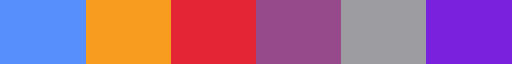

In [61]:
from matplotlib.colors import ListedColormap
petroff6 = ListedColormap(["#5790fc", "#f89c20", "#e42536", "#964a8b", "#9c9ca1", "#7a21dd"])
petroff6

    - or if more colors are needed the 10-color scheme:
        ```
        ["#3f90da", "#ffa90e", "#bd1f01", "#94a4a2", "#832db6", "#a96b59", "#e76300", "#b9ac70", "#717581", "#92dadd"]
        ```

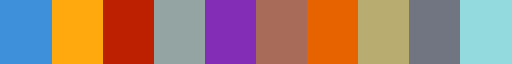

In [63]:
from matplotlib.colors import ListedColormap
petroff10 = ListedColormap(["#3f90da", "#ffa90e", "#bd1f01", "#94a4a2", "#832db6", "#a96b59", "#e76300", "#b9ac70", "#717581", "#92dadd"])
petroff10

- Sequential Data (e.g. 2D Heatmaps, Levels...): use the popular `"viridis"` colormap, which should be available in most plotting
libraries by default.


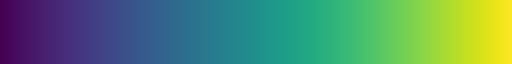

In [68]:
import matplotlib
viridis = matplotlib.colormaps['viridis']
viridis

# Tools to produce official CMS plots: full examples

Here we are going to see how to put together what we have seen in the first part of the tutorial in order to produce production-ready CMS plots with both tools. We strongly recommend that authors gather (in GitLab) all the files (macros, dot-C files or canvas files) necessary to reproduce all the figures in a paper.

### Pythonic-world: `mplhep`

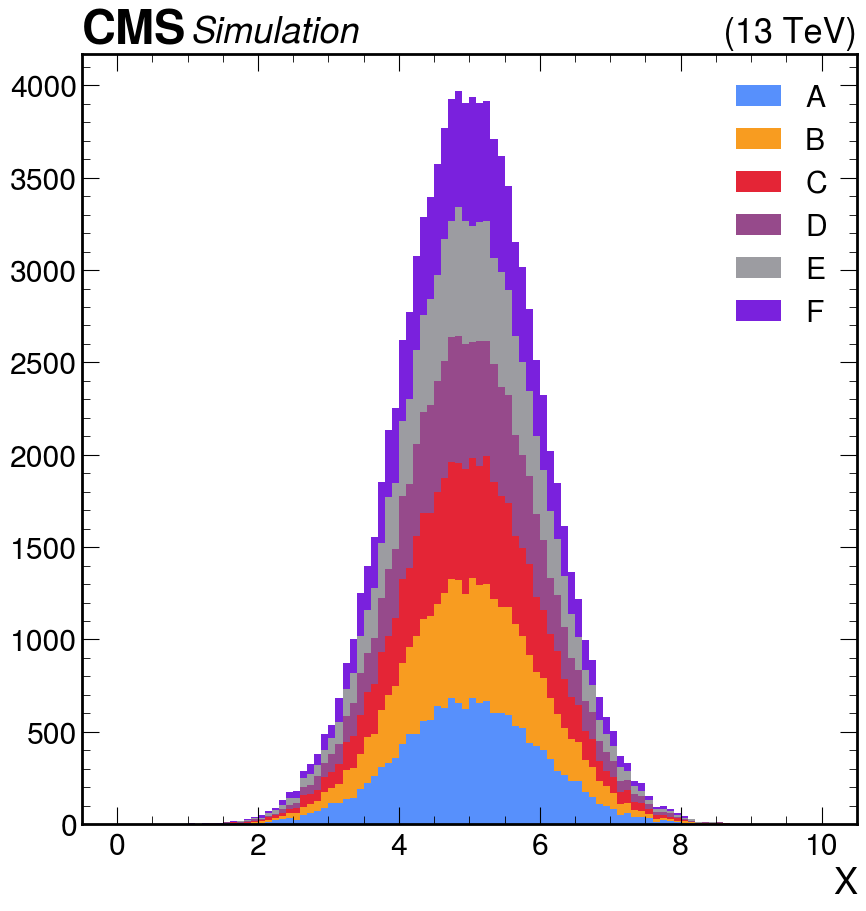

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import hist, uproot

 
h1d = hist.new.Reg(100, 0, 10, label="X").StrCat([], label="Sample", growth=True).Weight()\
        .fill(np.random.normal(5, 1, int(1e5)), np.random.choice(list("ABCDEF"), int(1e5)))

h2d = hist.new.Reg(100, 0, 10, label="X").Reg(100, 0, 10, label="Y").Weight()\
        .fill(np.random.normal(5, 3, int(1e6)), np.random.normal(5, 3, int(1e6)))
 
rf = uproot.recreate("test_file.root")
rf['h1d'] = h1d  # TH2 cat x regular axis
for sample in sorted(list(h1d.axes[1])):  # TH1 per cat
    rf[f'h1d_{sample}'] = h1d[:, sample]
rf['h2d'] = h2d  # Proper TH2
rf.close()
 
# Load CMS style including color-scheme
hep.style.use("CMS")
 
# Setup matplotlib figure
fig, ax = plt.subplots()
 
# Plot histograms
h1d.plot1d(ax=ax, stack=True, histtype='fill', sort='label');
 
# Style
plt.legend()
hep.cms.label();

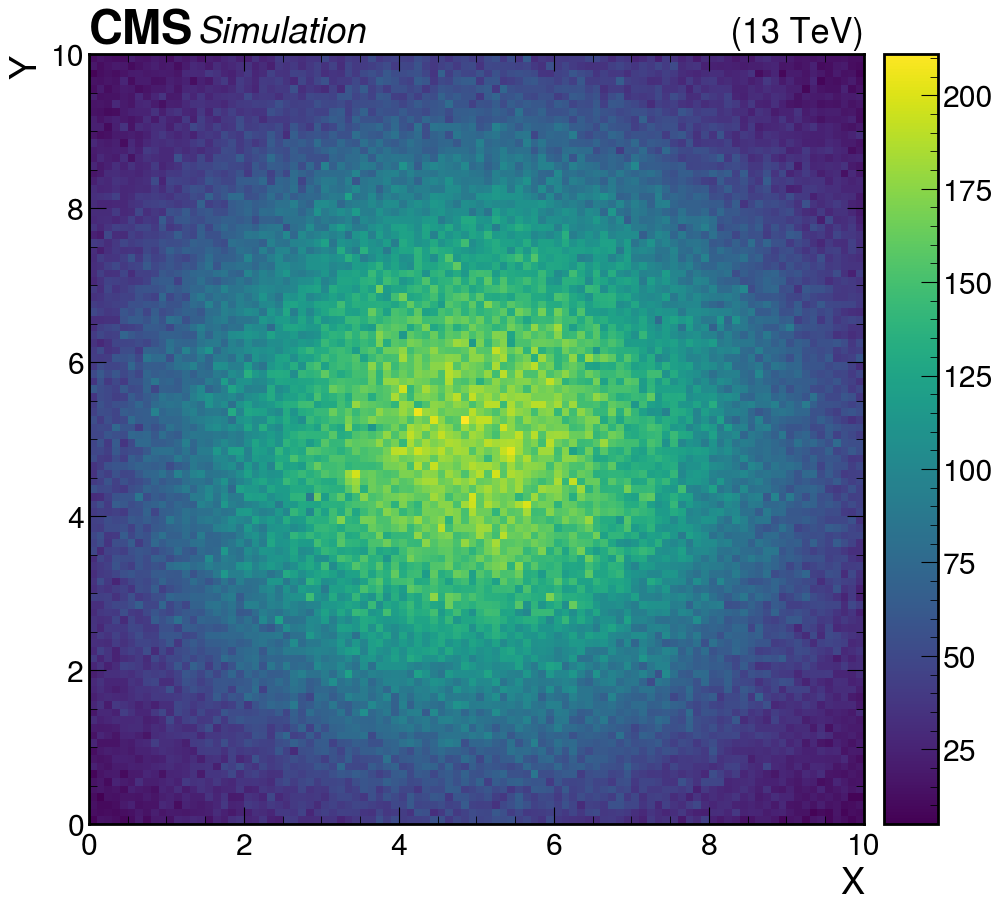

In [54]:
# Load CMS style including color-scheme (it's an editable dict)
plt.style.use(hep.style.CMS)

# Setup matplotlib figure
fig, ax = plt.subplots()

# Plot histogram
h2d.plot(ax=ax, cbarextend=True, flow='none');

# Style
hep.cms.label();

### ROOT-world: `cmsstyle`

In [55]:
import ROOT as r
import cmsstyle as CMS

In [56]:
# File reading 
f = r.TFile.Open('test_file.root')
th1_names = [k.GetName() for k in f.GetListOfKeys() if k.GetName().startswith("h1d_")]
th1s = [f.Get(sample) for sample in th1_names]

# Styling
CMS.SetExtraText("Simulation")
iPos = 0
canv_name = 'hist1d_root'
CMS.SetLumi("")
CMS.SetEnergy("13")
CMS.ResetAdditionalInfo()

# Plotting
stack = r.THStack("stack", "Stacked")
canv = CMS.cmsCanvas(canv_name,0,10,1e-3,4300,"X","",square=CMS.kSquare,extraSpace=0.01,iPos=iPos)
leg = CMS.cmsLeg(0.81, 0.89 - 0.05 * 7, 0.99, 0.89, textSize=0.04)

# Put samples in a dict {sample: th1} and draw
hist_dict = dict(zip([name.split("_")[-1] for name in th1_names], th1s))
CMS.cmsDrawStack(stack, leg, hist_dict)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: hist1d_root


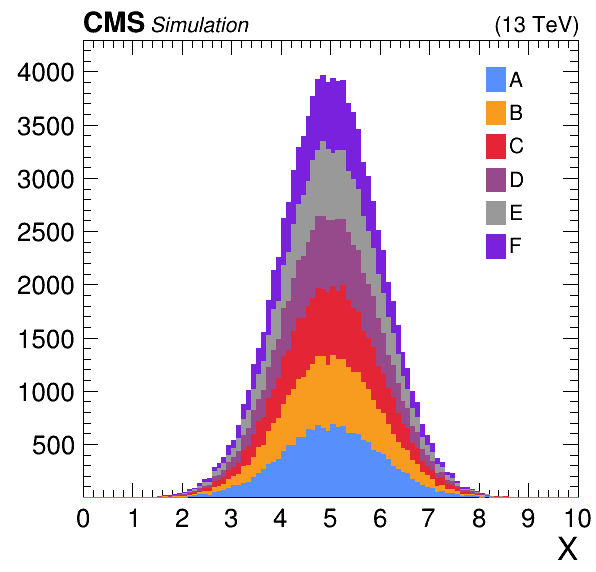

In [57]:
canv.Draw()

In [58]:
iPos = 0
scaleLumi = 0.80

# File reading 
f = r.TFile.Open('test_file.root')
hist2d = f.Get("h2d")

# Plotting
canv_name = 'hist2d_root'
canv = CMS.cmsCanvas(canv_name,0,10,0,10,"X","Y",square=CMS.kSquare,extraSpace=0.01,iPos=iPos,with_z_axis=True,scaleLumi=scaleLumi,)
hist2d.GetZaxis().SetTitle("Events normalised")
hist2d.GetZaxis().SetTitleOffset(1.4)
hist2d.Draw("same colz")

# Set the CMS official palette
CMS.SetCMSPalette()

# Allow to adjust palette position
CMS.UpdatePalettePosition(hist2d, canv)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: hist2d_root


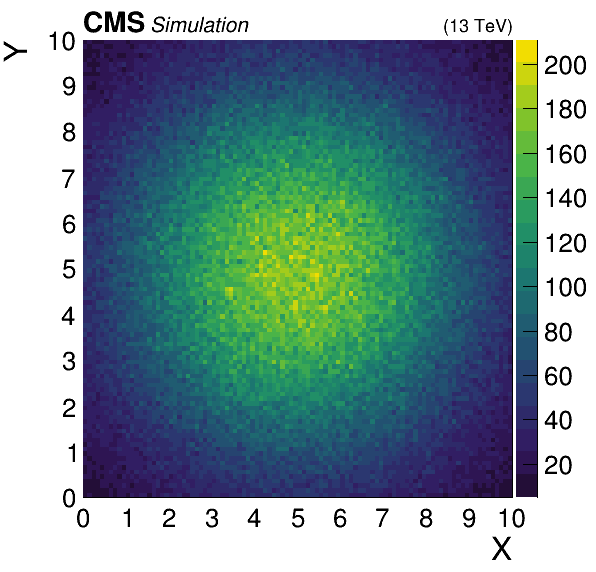

In [59]:
canv.Draw()

### Extended ROOT example - ratio plot

In [14]:
CMS.SetExtraText("Simulation Preliminary")


class Plotter:
    def __init__(self):
        self.outputPath = "./pdfs"
        os.makedirs(self.outputPath, exist_ok=True)
        self.CreateHistograms()

    def CreateHistograms(self):


    def Plot(self, square, iPos):
        

    def Plot2D(self, square, iPos):
        canv_name = f'example_2D_{"square" if square else "rectangle"}_pos{iPos}'
        # Allow to reduce the size of the lumi info
        scaleLumi = 0.80 if square else None
        canv = CMS.cmsCanvas(
            canv_name,
            0,
            5,
            0,
            5,
            "X",
            "Y",
            square=square,
            extraSpace=0.01,
            iPos=iPos,
            with_z_axis=True,
            scaleLumi=scaleLumi,
        )

        self.hist2d.GetZaxis().SetTitle("Events normalised")
        self.hist2d.GetZaxis().SetTitleOffset(1.4 if square else 1.2)
        self.hist2d.Draw("same colz")
        # Set a new palette
        CMS.SetAlternative2DColor(self.hist2d, CMS.cmsStyle)

        # Allow to adjust palette position
        CMS.UpdatePalettePosition(self.hist2d, canv)

        CMS.SaveCanvas(canv, os.path.join(self.outputPath, canv_name + ".pdf"))
        
        canv.Draw()

plotter = Plotter()

Warning in <TROOT::Append>: Replacing existing TH1: hist2d (Potential memory leak).


Warning in <TROOT::Append>: Replacing existing TH1: data (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: bkg (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: signal (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist2d (Potential memory leak).


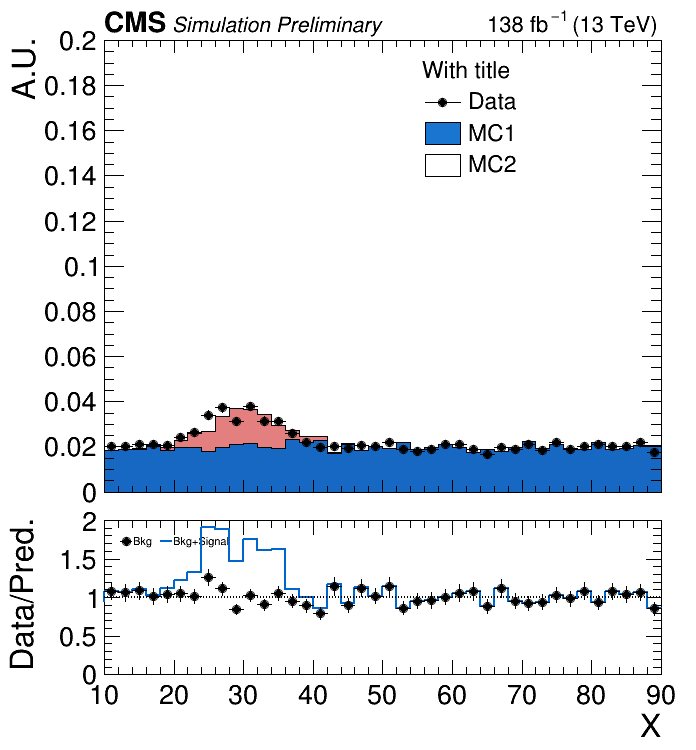

In [24]:
data = ROOT.TH1F("data", "data", 50, 0, 100)
bkg = ROOT.TH1F("bkg", "bkg", 50, 0, 100)
signal = ROOT.TH1F("signal", "signal", 50, 0, 100)

f_exp = ROOT.TF1("exp30","1./30*exp(-1./30)", 0, 100)
f_gaus305 = ROOT.TF1("gaus305","gaus", 0, 100)
f_gaus305.SetParameters(1, 30, 5)

bkg.FillRandom("exp30", 10000)
data.FillRandom("exp30", 10000)
signal.FillRandom("gaus305", 1000)
data.FillRandom("gaus305", 1000)
signal.Scale(0.1 / signal.Integral())
bkg.Scale(1.0 / bkg.Integral())
bkg_tot = bkg.Clone("bkg_tot")
bkg_tot.Add(signal)

data.Scale(bkg_tot.Integral() / data.Integral())
ratio = data.Clone("ratio")
ratio_nosignal = data.Clone("ratio_nosignal")

ratio.Divide(bkg_tot)
ratio_nosignal.Divide(bkg)


square=CMS.kSquare
iPos=0

# Takes care of fixing overlay and closing object

canv_name += "_ratio"
dicanv = CMS.cmsDiCanvas(
    canv_name,
    10,
    90,
    0,
    0.2,
    0.0,
    2.0,
    "X",
    "A.U.",
    "Data/Pred.",
    square=square,
    extraSpace=0.1,
    iPos=iPos,
)
dicanv.cd(1)

leg = CMS.cmsLeg(0.60, 0.89 - 0.05 * 5, 0.89, 0.89, textSize=0.05)
leg.AddEntry(data, "Data", "lp")
leg.AddEntry(bkg, "MC1", "f")
leg.AddEntry(signal, "MC2", "f")

CMS.cmsHeader(leg, "With title", textSize=0.05)

CMS.cmsDraw(bkg_tot, "hist", fcolor=ROOT.kRed + 1, alpha=0.5)
CMS.cmsDraw(bkg, "hist", fcolor=ROOT.kAzure + 2, alpha=0.9)
CMS.cmsDraw(data, "P", mcolor=ROOT.kBlack)

CMS.fixOverlay()

dicanv.cd(2)
leg_ratio = CMS.cmsLeg(
    0.17, 0.97 - 0.05 * 5, 0.35, 0.97, textSize=0.05, columns=2
)
# how alternative way to pass style options
style = {"style": "hist", "lcolor": ROOT.kAzure + 2, "lwidth": 2, "fstyle": 0}
CMS.cmsDraw(ratio_nosignal, **style)
CMS.cmsDraw(ratio, "P", mcolor=ROOT.kBlack)

leg_ratio.AddEntry(ratio, "Bkg", "lp")
leg_ratio.AddEntry(ratio_nosignal, "Bkg+Signal", "l")

ref_line = ROOT.TLine(10, 1, 90, 1)
CMS.cmsDrawLine(ref_line, lcolor=ROOT.kBlack, lstyle=ROOT.kDotted)

In [ ]:
plotter.Plot(square=CMS.kSquare, iPos=11)

### Extended mplhep example - ratio plot

In [69]:
a = hist.Hist.new.Reg(20,-2,2).Int64().fill(np.random.uniform(-2,2,size=3000))
b = hist.Hist.new.Reg(20,-2,2).Int64().fill(np.random.normal(0,0.5,size=5000))
tot = a + b
data = tot.copy()
data[...] = np.random.poisson(tot.values())

from hist.intervals import ratio_uncertainty

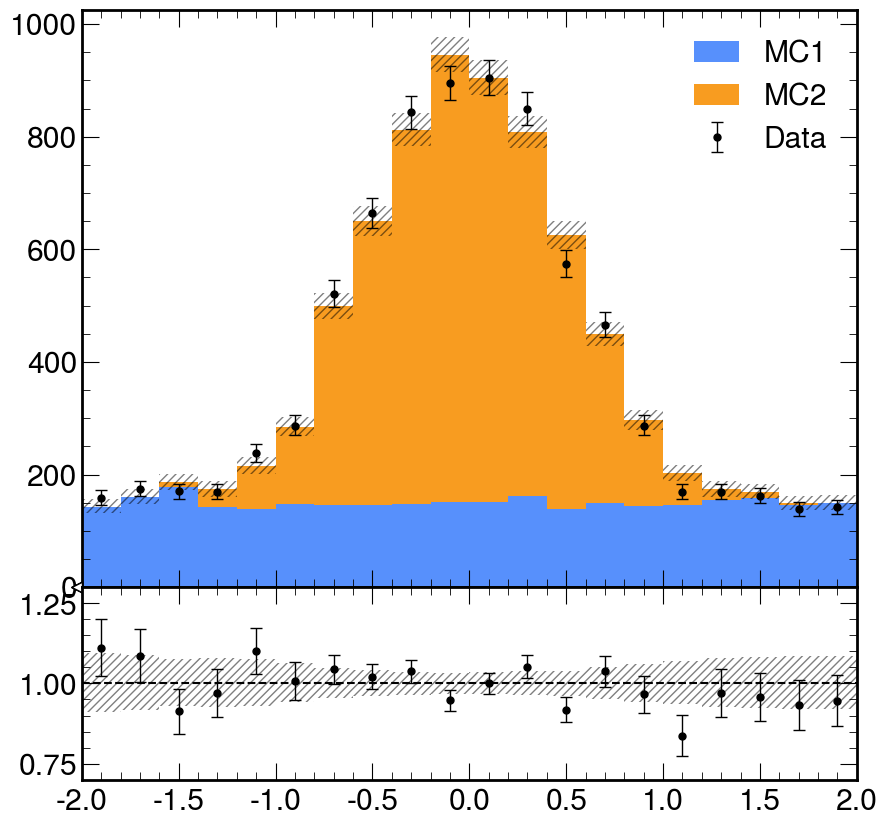

In [99]:
fig, (ax, rax) = plt.subplots(2, 1, gridspec_kw=dict(height_ratios=[3, 1], hspace=0), sharex=True)

# Main plot
hep.histplot([a, b], ax=ax, stack=True, histtype='fill', label=["MC1", "MC2"])
hep.histplot(data, ax=ax, histtype='errorbar', color='k', capsize=4, yerr=True, label="Data")

# Error band
errps = {'hatch':'////', 'facecolor':'none', 'lw': 0, 'edgecolor': 'k', 'alpha': 0.5}
hep.histplot(sum([a, b]), histtype='band', ax=ax, **errps)

# Ratio panel
hep.histplot(data.values()/tot.values(), tot.axes[0].edges, yerr=np.sqrt(data.values())/tot.values(),
    ax=rax, histtype='errorbar', color='k', capsize=4, label="Data")
# Error band
yerr = ratio_uncertainty(data.values(), tot.values(), 'poisson')
rax.stairs(1+yerr[1], edges=tot.axes[0].edges, baseline=1-yerr[0], **errps)


rax.axhline(1, ls='--', color='k')
rax.set_ylim(0.7, 1.3)
ax.set_xlim(-2, 2)
ax.legend();